In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats

In [137]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [138]:
df.loc[581]

age                19
sex              male
bmi             30.59
children            0
smoker             no
region      northwest
charges       1639.56
Name: 581, dtype: object

In [140]:
df.loc[582]

age                39
sex              male
bmi             45.43
children            2
smoker             no
region      southeast
charges       6356.27
Name: 582, dtype: object

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

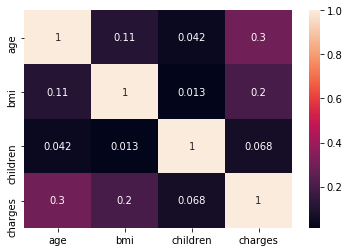

In [10]:
sns.heatmap(df.corr(),annot=True)

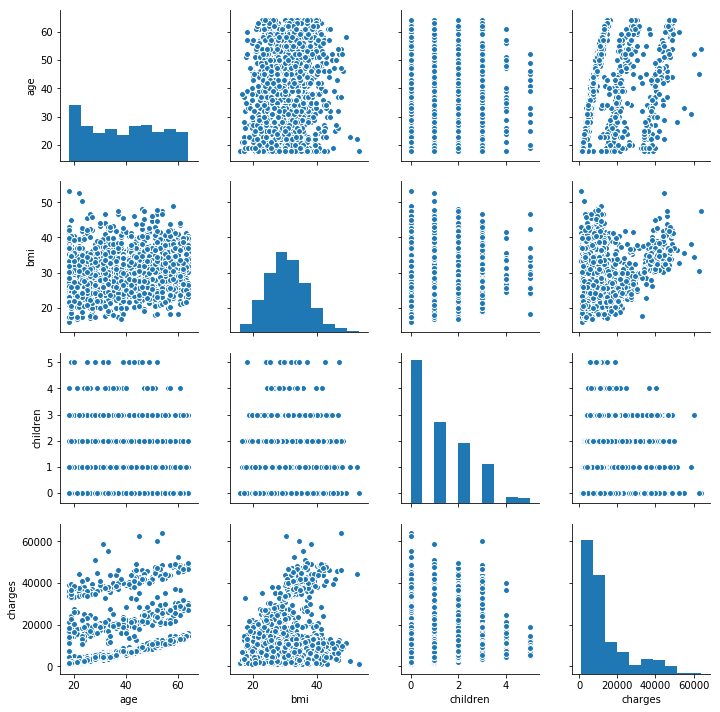

In [11]:
sns.pairplot(df,)

In [12]:
df.duplicated().sum()

1

In [13]:
df.loc[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
df[df['charges']==1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [15]:
df.drop(581,axis=0,inplace=True)

In [16]:
df.duplicated().sum()

0

C:\Users\kunal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


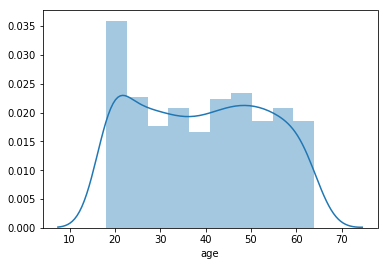

In [17]:
sns.distplot(df.age,bins=10)

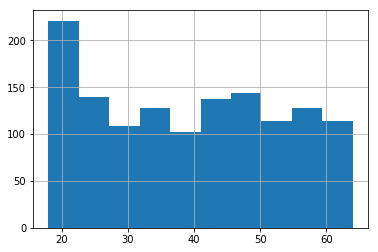

In [18]:
df.age.hist(bins=10)

In [19]:
df.age.value_counts()

18    69
19    67
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [20]:
df.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012AA30741D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000012AA30F4D68>]], dtype=object)

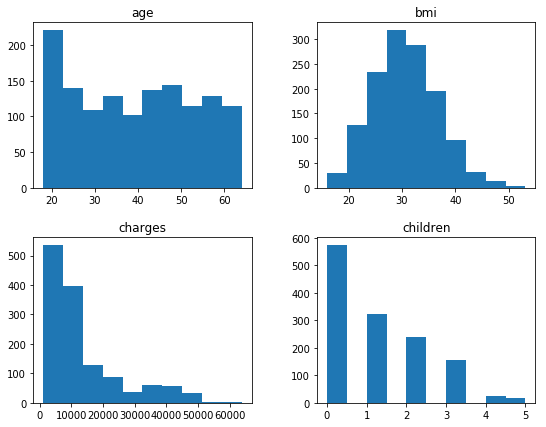

In [21]:
df.hist(bins=10,figsize=(9,7),grid=False)

bmi looks quiet normally distributed

Very few people have more than 2 children. 75% of the people have 2 or less children(inferred from describe)

Age seems be be distributed quiet uniformly 

charges are highly skewed

In [22]:
skewness=pd.DataFrame({'Skewness':[stats.skew(df.charges),
                                   stats.skew(df.bmi),
                                   stats.skew(df.age)]},
                     index=['charges','bmi','age'])

skewness

,Skewness
charges,1.513690
bmi,0.283596
age,0.054719


charges col positively skewed

Check outliers

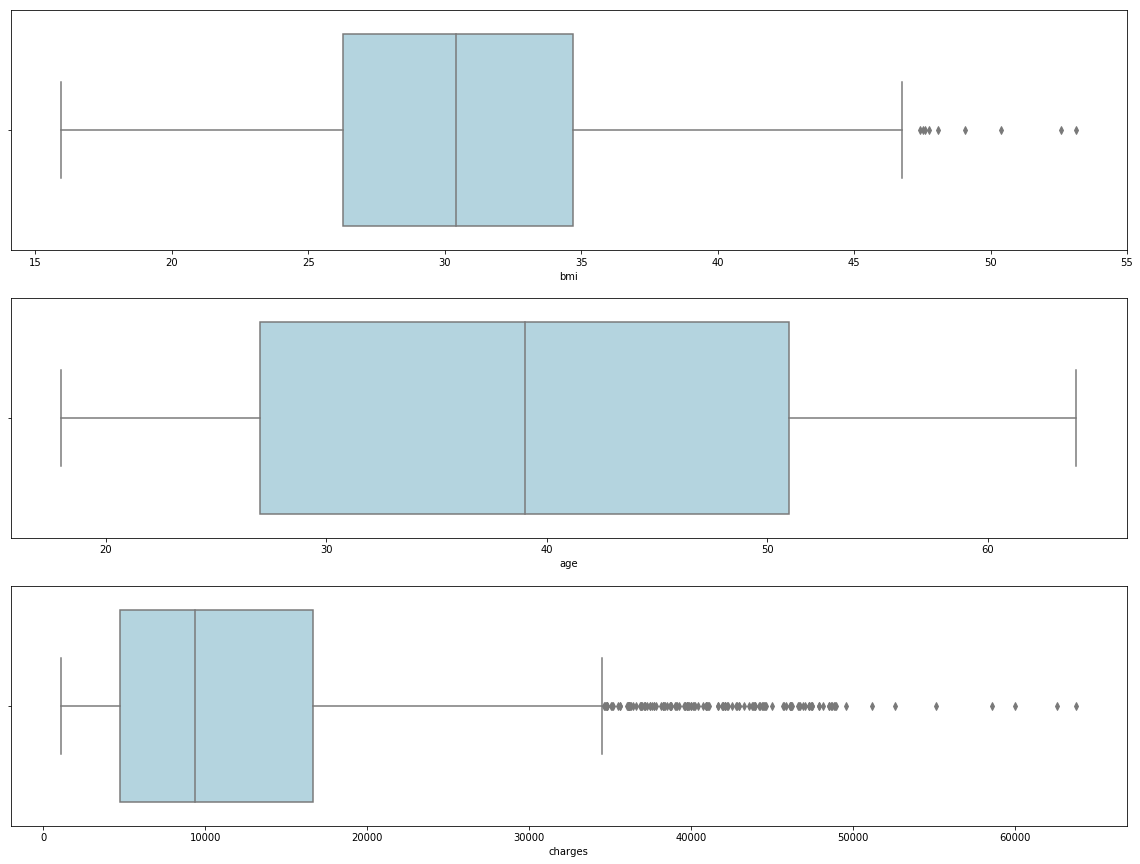

In [23]:
#Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='lightblue')

plt.show()

bmi has a few extreme values

charges as it is highly skewed, there are quiet a lot of extreme values

C:\Users\kunal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kunal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of charges for non-smokers')

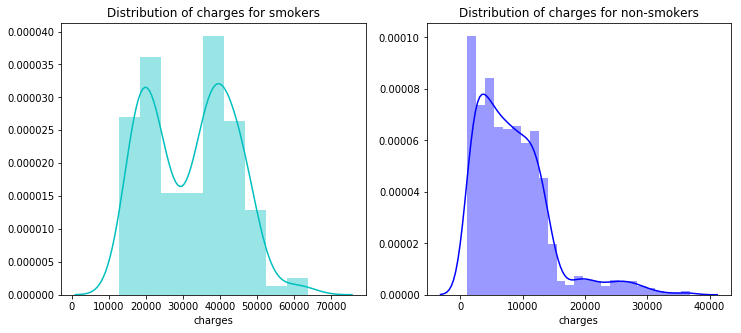

In [24]:
#df.charges.hist(by=df.smoker)
#plt.xlabel('Charges')
#plt.ylabel('Count')
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

No of non smoker seems to be high. Will check

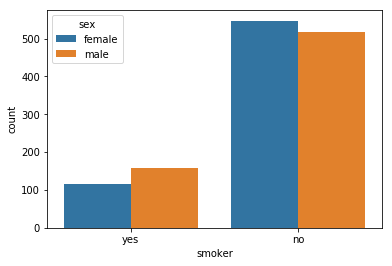

In [25]:
sns.countplot(x='smoker',data=df,hue='sex')

we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking.

In [26]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x=np.array(df[df.smoker=='yes']['charges'])
y=np.array(df[df.smoker=='no']['charges'])

#print(x)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (1.4067220949376498e-282) < 0.05


In [59]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


In [60]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.006) < 0.05


smoker,no,yes
sex,,
female,547,115
male,516,159


In [61]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['smoker'],df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.064) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,266,273,267
yes,67,58,91,58


In [70]:
#Is the distribution of bmi across women with no children, one child and two children, the same ?
# Test to see if the distributions of bmi values for females having different number of children, are significantly different
import copy
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = df[df['sex'] == 'female']
#print("here",female_df)

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


No. of children has no effect on bmi as the p_value (0.716) > 0.05


C:\Users\kunal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kunal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of charges for female')

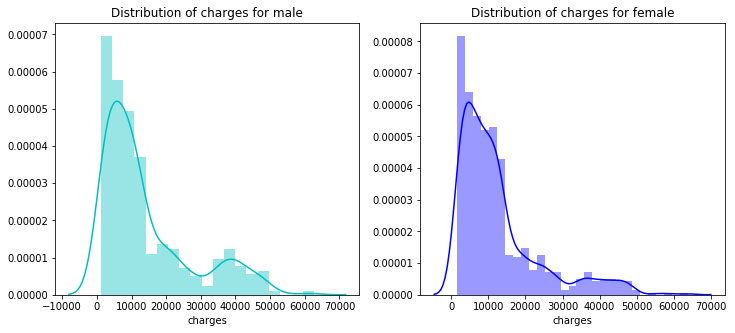

In [27]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.sex == 'male')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for male')

ax=f.add_subplot(122)
sns.distplot(df[(df.sex == 'female')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for female')

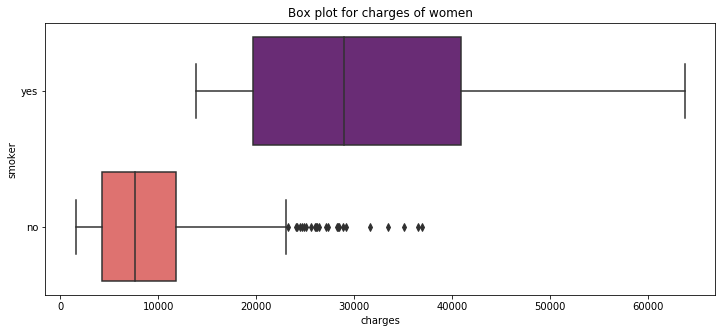

In [28]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 'female')] , orient="h", palette = 'magma')

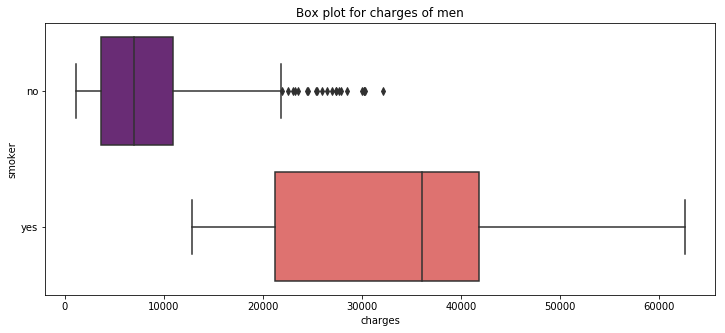

In [29]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 'male')] , orient="h", palette = 'magma')

In [30]:
#df[df['smoker'] == 'yes']

C:\Users\kunal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kunal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


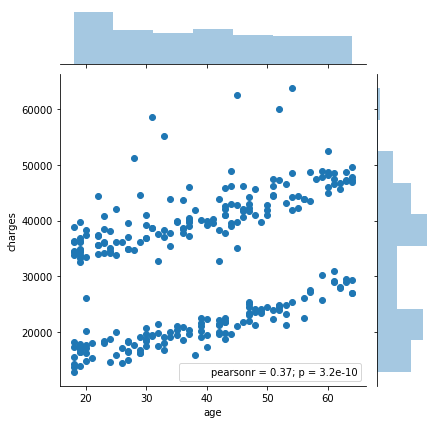

In [31]:
sns.jointplot(x='age',y='charges',data=df[df['smoker']=='yes'])

For smokers charges doesn't increase drastically with age

In [32]:
avg_bmi=np.mean(df.bmi)
avg_bmi

30.663451757666405

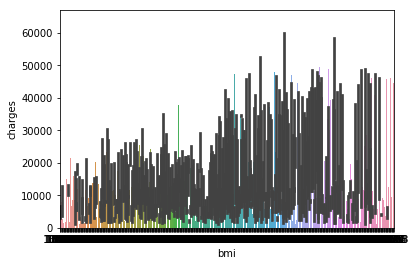

In [33]:
sns.barplot(x='bmi',y='charges',data=df)

Perople with high BMI pays more compared to low BMI

Text(0.5,1,'Scatter plot of charges and bmi')

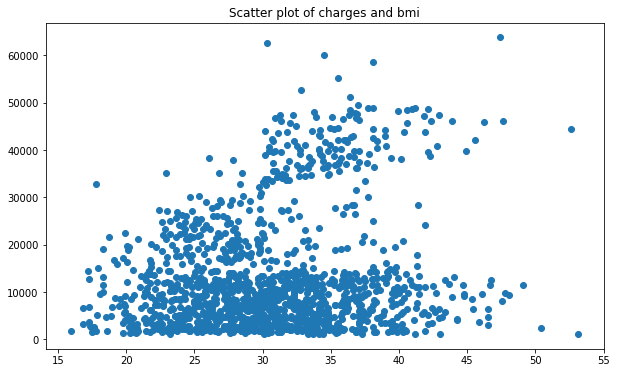

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['bmi'],y=df['charges'])
plt.title('Scatter plot of charges and bmi')

In [141]:
new_cols=pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)

In [142]:
new_cols.head()
new_cols.drop(['age','bmi','children','charges'],axis=1,inplace=True)

In [144]:
new_cols.loc[581]

sex_male            1
smoker_yes          0
region_northwest    1
region_southeast    0
region_southwest    0
Name: 581, dtype: uint8

In [47]:
from sklearn.preprocessing import StandardScaler

In [143]:
sc=StandardScaler()
df[['age','bmi','children']]=sc.fit_transform(df[['age','bmi','children']])

In [147]:
df=pd.concat([df,new_cols],axis=1)
df.drop(['sex','smoker','region'],axis=1,inplace=True)

In [148]:
df.loc[581]

age                   -1.438764
bmi                   -0.012040
children              -0.908614
charges             1639.563100
sex_male               1.000000
smoker_yes             0.000000
region_northwest       1.000000
region_southeast       0.000000
region_southwest       0.000000
Name: 581, dtype: float64

In [128]:
df.corr()['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
sex_male            0.058044
smoker_yes          0.787234
region_northwest   -0.038695
region_southeast    0.073578
region_southwest   -0.043637
Name: charges, dtype: float64

In [58]:
df.corr()['charges']

age         0.298308
bmi         0.198401
children    0.067389
charges     1.000000
Name: charges, dtype: float64

Linear Regression Model

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [105]:
pred_feat=list(df.columns)
pred_feat.remove('charges')
target_col='charges'

In [89]:
df.shape[0]

1338

In [169]:
lr=LinearRegression(n_jobs=-1)
kfold=KFold(df.shape[0],n_folds=3)

In [110]:
target_col

'charges'

In [ ]:
predictions=[]

In [177]:
predictions=[]
for train,test in kfold:
    train_predictors=df[pred_feat].iloc[train,:]
    train_target=df[target_col].iloc[train]
    lr.fit(train_predictors,train_target)
    test_predictions=lr.predict(df[pred_feat].iloc[test,:])
    predictions.extend(test_predictions)

In [153]:
predictions=pd.Series(predictions)

In [182]:
ab=pd.DataFrame([pd.Series(predictions),df['charges']])

In [183]:
ab

,0,1,2,3,4,5,6,7,8,9,...,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
Unnamed 0,25339.276492,3381.688889,6797.708589,3317.777381,5163.497475,3923.861203,10901.154349,8339.088087,8660.961619,11762.238768,...,3087.473217,13971.30885,11252.470427,4530.275189,17070.305403,11820.964747,3656.660007,4273.323536,1396.537888,37493.124771
charges,16884.924000,1725.552300,4449.462000,21984.470610,3866.855200,3756.621600,8240.589600,7281.505600,6406.410700,28923.136920,...,22395.744240,10325.20600,12629.165600,10795.937330,11411.685000,10600.548300,2205.980800,1629.833500,2007.945000,29141.360300


In [170]:
kfold.n

1338

In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split

X = df.drop(['charges'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.884186506012


In [186]:
from sklearn.cross_validation import ShuffleSplit,cross_val_score

cv = ShuffleSplit(df.shape[0],n_iter=10, test_size=0.3, random_state=50)
pred_score=cross_val_score(lr,df[pred_feat],df[target_col],scoring='r2',cv=cv)

In [189]:
pred_score.mean()

0.74553168779946866

In [194]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score(predictions,df['charges'])

0.65938978620022426

In [195]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,Y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(Y_train,forest_train_pred),
mean_squared_error(Y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(Y_train,forest_train_pred),
r2_score(Y_test,forest_test_pred)))

MSE train data: 3825243.769, MSE test data: 19350330.441
R2 train data: 0.973, R2 test data: 0.877
